## **Rescaling**

#### **Q1:** Why do we need to rescale our data?

Many techniques are sensitive to the ***scale*** of your data (*data range*). Let's explain it with an example: 

* Imagine that you have a data set consisting of the *heights* and *weights* of hundreds of people, and that you are trying to identify clusters of body sizes.

* Intuitively, we would like clusters to represent points near each other, which means that we need some notion of distance between points. 

   * A natural approach might be to treat (height, weight) pairs as points in two-dimensional space and compute the Euclidean distance between them.

In [1]:
#  Consider the following dataframe
import pandas as pd

df = pd.DataFrame( {'Person':['A','B','C'], 'Height (inches)':[63,67,70], 
      'Height (centimeters)':[160,170.2,177.8], 'Weight (pounds)':[150,160,171] })

df

,Person,Height (inches),Height (centimeters),Weight (pounds)
0,A,63,160.0,150
1,B,67,170.2,160
2,C,70,177.8,171


In [2]:
import math 

def distance (v, w):
   return math.sqrt( sum([ (v_i-w_i)**2 for v_i, w_i in zip(v,w) ]) )

# inches
Ai = [ df['Height (inches)'][0], df['Weight (pounds)'][0] ]
Bi = [ df['Height (inches)'][1], df['Weight (pounds)'][1] ] 
Ci = [ df['Height (inches)'][2], df['Weight (pounds)'][2] ]

# centimeters
Ac = [ df['Height (centimeters)'][0], df['Weight (pounds)'][0] ]
Bc = [ df['Height (centimeters)'][1], df['Weight (pounds)'][1] ] 
Cc = [ df['Height (centimeters)'][2], df['Weight (pounds)'][2] ]

print(f"AB: {distance(Ai,Bi):.2f} - {distance(Ac,Bc):.2f}")
print(f"AC: {distance(Ai,Ci):.2f} - {distance(Ac,Cc):.2f}")
print(f"BC: {distance(Bi,Ci):.2f} - {distance(Bc,Cc):.2f}")


AB: 10.77 - 14.28
AC: 22.14 - 27.53
BC: 11.40 - 13.37


* **Q1:** Does the scale of the data affect results?

* **Q2:** What is the closest pair of points?

### **Standardizing**

* It’s problematic if changing units can change results like this. 

* When dimensions aren’t comparable with one another, we will sometimes rescale our data so that each dimension has **mean 0** and **standard deviation 1**. 

   * This effectively gets rid of the units, converting each dimension to “standard deviations from the mean.”

   * This value is known as standard score and is most commonly called **z-scores**.

#### **Z-score**

We compute the standardized value $z_i$ of a data point $x_i$ as follow:

$z_i = \frac{x_i - mean(x)}{std(x)}$

Where,

$z_i$: ith standardized value,

$x$: all values,

$mean(x)$: the mean value of all x values

$std(x)$: the standard deviation of the x values

In [3]:
# Calculate the standard deviation of the two columns

df[['Height (inches)', 'Height (centimeters)']].std()

Height (inches)         3.511885
Height (centimeters)    8.931592
dtype: float64

In [4]:
# Calculate the means of the two columns.

df[['Height (inches)', 'Height (centimeters)']].mean()

Height (inches)          66.666667
Height (centimeters)    169.333333
dtype: float64

In [5]:
df['z_inches'] = ( df['Height (inches)'] - df['Height (inches)'].mean()) / df['Height (inches)'].std()
df['z_cm'] = ( df['Height (centimeters)'] - df['Height (centimeters)'].mean()) / df['Height (centimeters)'].std()

df.head()

,Person,Height (inches),Height (centimeters),Weight (pounds),z_inches,z_cm
0,A,63,160.0,150,-1.044074,-1.044980
1,B,67,170.2,160,0.094916,0.097034
2,C,70,177.8,171,0.949158,0.947946


We go back to our two preliminar questions:

* **Q1:** Does the scale of the data affect results?

* **Q2:** What is the closest pair of points?

In [6]:
# inches
Ai = [ df['z_inches'][0], df['Weight (pounds)'][0] ]
Bi = [ df['z_inches'][1], df['Weight (pounds)'][1] ] 
Ci = [ df['z_inches'][2], df['Weight (pounds)'][2] ]

# centimeters
Ac = [ df['z_cm'][0], df['Weight (pounds)'][0] ]
Bc = [ df['z_cm'][1], df['Weight (pounds)'][1] ] 
Cc = [ df['z_cm'][2], df['Weight (pounds)'][2] ]

print(f"AB: {distance(Ai,Bi):.2f} - {distance(Ac,Bc):.2f}")
print(f"AC: {distance(Ai,Ci):.2f} - {distance(Ac,Cc):.2f}")
print(f"BC: {distance(Bi,Ci):.2f} - {distance(Bc,Cc):.2f}")

AB: 10.06 - 10.06
AC: 21.09 - 21.09
BC: 11.03 - 11.03


### **Exercise**

Actually you will apply the same procedure to all your data (columns), in our case we did not standardize the **Weight** column.

* **Q1:** How do you standardize the 'Weight (pounds)' column?

* **Q2:** What is the closest pair of points?

* **Q3:** How do you check the results?

In [7]:
### The code goes here!


## **Clustering**

* **Q1:** How do we group data in homogeneous clusters?

* **Q2:** How do we group our customers?

#### **K-means**

* K-means is an ***unsupervised*** machine learning ***clustering*** algorithm.

  1. **Input:** unlabeled data.

      * We do not have a set of labeled data that we can use for making predictions about new, unlabeled data. 

  2. **Output:** unlabeled clusters. 
  
      * The clusters won’t label themselves, you’ll have to do that by looking at the data.

#### How the algorithm works

* The k-means algorithm searches for a **predetermined number of clusters** within an unlabeled multidimensional dataset.

   * The number of clusters $k$ is chosen in advance (user input);
   
   * The goal is to partition the inputs into $k$ sets $S_1$, ..., $S_k$;

     * Minimizing the total sum of squared distances from each point to the center of its assigned cluster.

   * The “*cluster center*” is the arithmetic **mean** of all the points belonging to the cluster.

#### The algorithm apply the following procedure

1. Start with a set of k-means (cluster centers), which are points in d-dimensional space.

2. Assign each point to the mean (cluster center) to which it is closest.

3. If no point’s assignment has changed, stop and keep the clusters.

4. If some point’s assignment has changed, recompute the means (cluster centers) and return to step 2.

In step 2 we assign each point to a cluster, based on its distance from the  cluster center (mean). In step 4 we recompute the value of the cluster centers (k-means) as the arithmetic mean of all the points belonging to the cluster.  

#### We use a synthetic dataset to show how k-means works.

In [8]:
import matplotlib.pyplot as plt
from sklearn import cluster
%matplotlib inline

# 1. We load the dataset 

df = pd.read_csv("customer.csv")
df.head()

,age,salary
0,37,47180
1,22,35545
2,47,33381
3,32,26099
4,27,32159


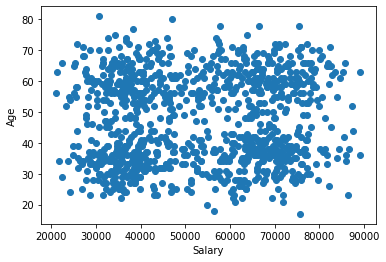

In [9]:
# 2. We plot the data

fig, ax = plt.subplots()

ax.scatter(df['salary'], df['age'])

ax.set_xlabel('Salary') # Add an x-label to the axes.
ax.set_ylabel('Age') # Add a y-label to the axes.

fig.show()


* **Q1:** How do we chose the value of $k$?

In this case we can set $k=4$ by looking at the plot. We will see later on how we can adjust this parameter.

In [10]:
# 3. We standardize the columns

df['z_salary'] = (df['salary'] - df['salary'].mean())/df['salary'].std()
df['z_age'] = (df['age'] - df['age'].mean())/df['age'].std()

df.head()

,age,salary,z_salary,z_age
0,37,47180,-0.339615,-0.734964
1,22,35545,-1.036505,-1.787216
2,47,33381,-1.166120,-0.033462
3,32,26099,-1.602283,-1.085715
4,27,32159,-1.239313,-1.436466


* **Q1:** Why do we standardize columns?

* **Q2:** What does it mean to standardize a column?

In [11]:
# 4. We run k-means clustering with 4 clusters.

model = cluster.KMeans(n_clusters=4, random_state=10)

# ** NOTE **
#
#  n_clusters: int, default=8
#
#     The number of clusters to form as well as the number of centroids to generate
#
#  random_state: int, RandomState instance or None, default=None
#
#     Determines random number generation for centroid initialization. 
#     Use an int to make the randomness deterministic.
#
# ** NOTE **

model.fit(df[['z_salary','z_age']])

# ** NOTE **
#
#  fit()
#
#     Compute k-means clustering.
#
# ** NOTE **


# We create a column called cluster that contains 
# the label of the cluster to which each data point belongs.

df['cluster'] = model.labels_

df.head()


,age,salary,z_salary,z_age,cluster
0,37,47180,-0.339615,-0.734964,1
1,22,35545,-1.036505,-1.787216,1
2,47,33381,-1.166120,-0.033462,1
3,32,26099,-1.602283,-1.085715,1
4,27,32159,-1.239313,-1.436466,1


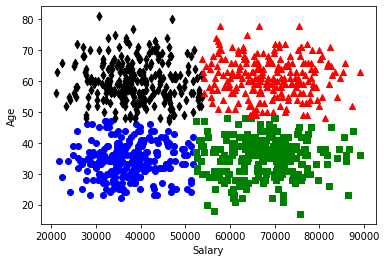

In [12]:

# 4. We plot the clusters.

fig, ax = plt.subplots()

colors = ['r', 'b', 'k', 'g']
markers = ['^', 'o', 'd', 's']

for c in df['cluster'].unique():
  d =  df[ df['cluster'] == c ]
  ax.scatter(d['salary'], d['age'], marker=markers[c], color=colors[c])

ax.set_xlabel('Salary')
ax.set_ylabel('Age')
fig.show()

## **Recency-Frequency-Monetary (RFM) model**

* **Q1:** What information do we use to create/learn clusters?

#### **Customer Segmentation**

* Customer segmentation is the practice of **dividing** a customer base into **groups of individuals** that are similar.

    * Age, gender, interests and spending habits.

* RFM analysis is a proven marketing model for behavior based customer segmentation. It groups customers based on their transaction history: 
   
   * *How recently*, *how often* and *how much* did they buy.


### What is Recency, Frequency and Monetary analysis?

The RFM model combines three different customer attributes to rank customers.

1. **Recency:** time since the customer made his/her most recent purchase.

2. **Frequency:** number of purchases this customer made within a designated time period.

3. **Monetary:** total money spent.

We combine these three scores to create the RFM score, that can be used to segment our customers into different groups.

 


### **Case Study: Online Retail Store**

* Dataset - https://archive.ics.uci.edu/ml/datasets/online+retail

**About Dataset**

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Dataset Description**

* **InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'C', it indicates a cancellation. 
* **StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 
* **Description:** Product (item) name. Nominal. 
* **Quantity:** The quantities of each product (item) per transaction. Numeric. 
* **InvoiceDate:** Invice Date and time. Numeric, the day and time when each transaction was generated. 
* **UnitPrice:** Unit price. Numeric, Product price per unit in sterling. 
* **CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 
* **Country:** Country name. Nominal, the name of the country where each customer resides.

*Nominal:* a type of data that is used to label variables without providing any quantitative value.

In [13]:
# We load the dataset

df = pd.read_csv("Online_Retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
# We check the number of rows and columns

df.shape

(541909, 8)

In [15]:
# We know that if the InvoiceNo code starts with letter 'C', 
# it indicates a cancellation.
#
# We remove all transactions that have been cancelled
#

df = df[ ~df['InvoiceNo'].str.startswith('C') ]

In [16]:
# We have two numeric columns: Quantity and Unit Price.

df[['Quantity','UnitPrice']].describe()

,Quantity,UnitPrice
count,532621.000000,532621.000000
mean,10.239972,3.847621
std,159.593551,41.758023
min,-9600.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


* We observe that *Quantity* and *Unit Price* columns include negative values.

  * We are interested in transactions that describe customer purchases.

  * We can remove these rows.

* **Q1:** What are these transactions?

In [17]:
# We try do understand from the description what is 
# the content of these rows.

df[ (df['Quantity'] <= 0) & (~df['Description'].isnull()) ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
7313,537032,21275,?,-30,2010-12-03 16:50:00,0.0,NaN,United Kingdom
13217,537425,84968F,check,-20,2010-12-06 15:35:00,0.0,NaN,United Kingdom
13218,537426,84968E,check,-35,2010-12-06 15:36:00,0.0,NaN,United Kingdom
13264,537432,35833G,damages,-43,2010-12-06 16:10:00,0.0,NaN,United Kingdom
21338,538072,22423,faulty,-13,2010-12-09 14:10:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


* It seems that the dataset includes lost, damaged and returned items.


In [18]:
# We remove the transactions with a negative Quantity

df = df[ df['Quantity'] > 0 ]

# We remove the transactions with a negative Unit Price

df = df[ df['UnitPrice'] > 0]

#### **Q1:** Does the dataframe contain null values?





In [19]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

* The dataframe contains transaction that failed to capture the CustomerID. 

* We want to cluster our customers, thus these rows are of not use for our task. 

   *  We remove the rows.

In [20]:
df.dropna(inplace=True)

# ** NOTE **
#
#  dropna()
#
#    Remove missing values.
#
#    inplace: bool, default False
#      Whether to modify the DataFrame rather than creating a new one.
#
# ** NOTE **


#### **Q1:** Does the dataframe contain duplicated rows?



In [21]:
df.duplicated().sum()

5192

In [22]:
df = df.drop_duplicates()

# ** NOTE **
#
#  drop_duplicates()
# 
#   Return DataFrame with duplicate rows removed.
#
# ** NOTE **

In [23]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### **Exercise**

#### Exploratory Data Analysis

* **Q1:** Top 10 ordering countries (number of orders).

* **Q2:** Number of unique customers.

* **Q3:** Check the constraint StockCode/Description.

In [24]:
# The code goes here!

### **Checking Data Types**

In [25]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [26]:
# We convert the InvoiceDate to DateTime

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df = df.astype({'CustomerID': 'int64'})

In [27]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

We expect each invoice to have a unique date, let's check the constraint InvoiceNo/InvoiceDate.

In [28]:
df[ df.groupby(["InvoiceNo"])["InvoiceDate"].transform('nunique').gt(1) ].sort_values(by=['InvoiceDate'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2421,536591,21427,SKULLS STORAGE BOX SMALL,1,2010-12-01 16:57:00,2.10,14606,United Kingdom
2440,536591,20768,GREEN FERN JOURNAL,1,2010-12-01 16:57:00,2.55,14606,United Kingdom
2441,536591,22081,RIBBON REEL FLORA + FAUNA,1,2010-12-01 16:57:00,1.65,14606,United Kingdom
2442,536591,20780,BLACK EAR MUFF HEADPHONES,1,2010-12-01 16:57:00,5.49,14606,United Kingdom
2443,536591,51014C,"FEATHER PEN,COAL BLACK",12,2010-12-01 16:57:00,0.85,14606,United Kingdom
...,...,...,...,...,...,...,...,...
498962,578548,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,2,2011-11-24 15:02:00,2.55,17345,United Kingdom
498963,578548,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,2,2011-11-24 15:02:00,7.95,17345,United Kingdom
498952,578548,84673A,PINK FLY SWAT,2,2011-11-24 15:02:00,0.65,17345,United Kingdom
498991,578548,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,3,2011-11-24 15:03:00,2.55,17345,United Kingdom


It seems that the same invoice can contains different dates, it is that correct?

In [29]:
# We create a new column containing only the date.

df['Date'] = df["InvoiceDate"].dt.date
df['Date'] = pd.to_datetime(df['Date'])

# We check the constraint InvoiceNo/Date

df[ df.groupby(["InvoiceNo"])["Date"].transform('nunique').gt(1) ].sort_values(by=['Date'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date


### **RFM Dataframe**

To apply the RFM analysis we need the following information: *Recency*, *Frequency*, *Monetary*.

* **Q1**: How do we extranct these information from our dataset?



In [30]:
# 1. We create a new column called 'TotalPrice'

df['TotalPrice'] = df['UnitPrice']*df['Quantity']

# 2. We remove the columns we do not need

df.drop(['StockCode','Description', 'Country', 'UnitPrice', 'Quantity', 'InvoiceDate'], axis=1, inplace=True)

# 3. We group data by 'InvoiceNo'

df.head()

,InvoiceNo,CustomerID,Date,TotalPrice
0,536365,17850,2010-12-01,15.30
1,536365,17850,2010-12-01,20.34
2,536365,17850,2010-12-01,22.00
3,536365,17850,2010-12-01,20.34
4,536365,17850,2010-12-01,20.34


Before this operation we need to check the following constraints:

 * InvoiceNo/CustomerID

In [31]:
# InvoiceNo/CustomerID constraint

df[ df.groupby(["InvoiceNo"])["CustomerID"].transform('nunique').gt(1) ]

,InvoiceNo,CustomerID,Date,TotalPrice


In [32]:
# 3. We group data by 'InvoiceNo'

df.groupby(['InvoiceNo'], as_index=False).agg({'Date': 'first', 'CustomerID': 'first', 'TotalPrice': 'sum'})

,InvoiceNo,Date,CustomerID,TotalPrice
0,536365,2010-12-01,17850,139.12
1,536366,2010-12-01,17850,22.20
2,536367,2010-12-01,13047,278.73
3,536368,2010-12-01,13047,70.05
4,536369,2010-12-01,13047,17.85
...,...,...,...,...
18527,581583,2011-12-09,13777,124.60
18528,581584,2011-12-09,13777,140.64
18529,581585,2011-12-09,15804,329.05
18530,581586,2011-12-09,13113,339.20


#### **Recency**

**Q1**: How many days ago was customers last purchase?

* We need to fix a reference date to compute how recent is the most recent tranasction of each customer.

* We fix the reference date to a day after the most recent transaction date in the dataset.

In [33]:
refDate = df['Date'].max()
print(refDate)

refDate += pd.Timedelta("1 day")
print(refDate)

2011-12-09 00:00:00
2011-12-10 00:00:00


In [34]:
# We calculate the days difference between the most recent transaction 
# carried out by the customer and the reference date.

df['Recency'] = (refDate - df['Date']).dt.days

dfRFM = df.groupby("CustomerID", as_index=False).agg({'Recency' : 'min'})

dfRFM.head()

,CustomerID,Recency
0,12346,326
1,12347,3
2,12348,76
3,12349,19
4,12350,311


#### **Frequency**

**Q1**: How many purchases did customers make?

In [35]:
# We count the number of orders made by each customer

F = df[['CustomerID', 'InvoiceNo']].groupby('CustomerID', as_index=False).count()
F.rename(columns={'InvoiceNo': 'Frequency'}, inplace= True)

F.head()

,CustomerID,Frequency
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17


In [36]:
# We merge the two dataframe

dfRFM = dfRFM.merge(F)

# ** NOTE **
#
#  merge()
# 
#    Merge DataFrame or named Series objects with a database-style join.
#    A named Series object is treated as a DataFrame with a single named column.
#
# ** NOTE **

dfRFM.head()

,CustomerID,Recency,Frequency
0,12346,326,1
1,12347,3,182
2,12348,76,31
3,12349,19,73
4,12350,311,17


#### **Monetary**

**Q1:** How much did customers spend for their purchases?

In [37]:
# We compute the total amount spent by each customer

M = df[['CustomerID', 'TotalPrice']].groupby('CustomerID', as_index=False).sum()
M.rename(columns={'TotalPrice': 'Monetary'}, inplace= True)

M.head()

,CustomerID,Monetary
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [38]:
# We merge the two dataframe

dfRFM = dfRFM.merge(M)

dfRFM.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12347,3,182,4310.00
2,12348,76,31,1797.24
3,12349,19,73,1757.55
4,12350,311,17,334.40


## **Clustering**

To do customer segmentation we use the k-means clustering algorithm. 

Before applying the algorithm:

* We check for outliers

  * We look for outliers from the data analysis point of view. These are transactions that are valid from the business point of view as they are genuine transaction records. 

* We standardize our data







### **Outliers**

* An outlier is a point or set of data points that lie away from the rest of the data values of the dataset. 

  * An outlier is a data point(s) that appear away from the overall distribution of data values in a dataset.

**Q1:** How do we check if our data contain outliers?

**Q2:** How do we identify outliers?

**Q3:** How do we treat outliers? 

**Q4:** Why is important to look for outliers?
 

#### **Q1:** How do we check if our data contain outliers?


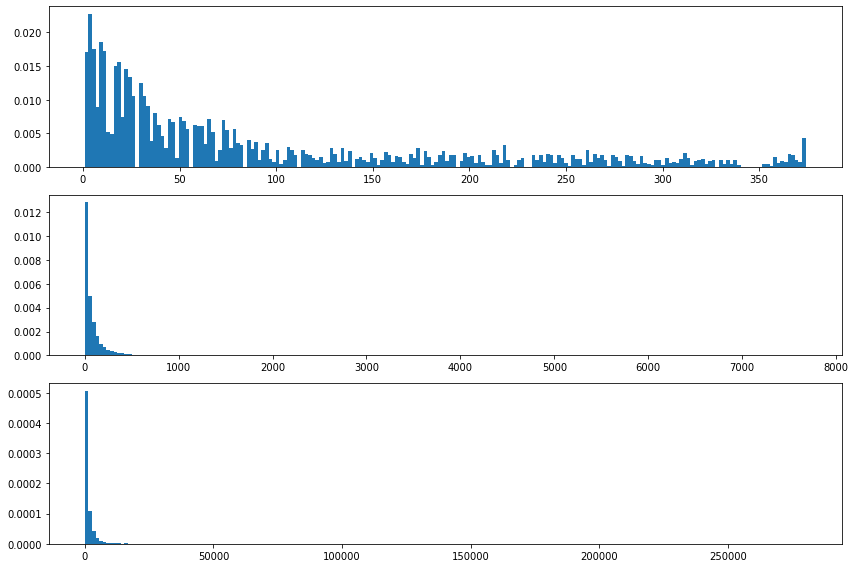

In [39]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))

nBins = 200
ax1.hist( dfRFM['Recency'],   nBins,  density=True)
ax2.hist( dfRFM['Frequency'], nBins,  density=True)
ax3.hist( dfRFM['Monetary'],  nBins,  density=True)

fig.tight_layout()
fig.show()

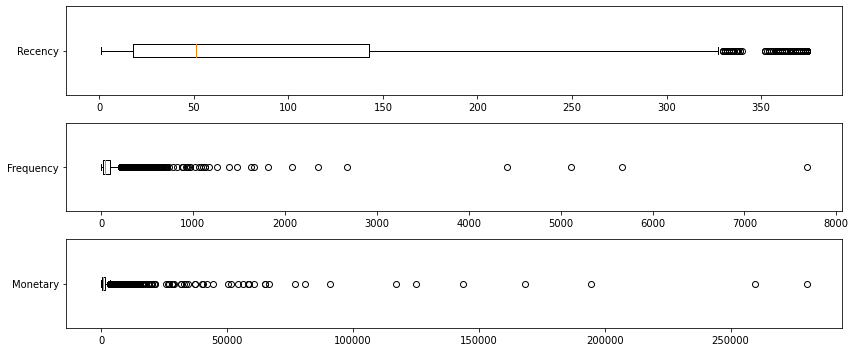

In [40]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12, 5))

ax1.boxplot( dfRFM['Recency'],    vert=False, labels=['Recency']   )
ax2.boxplot( dfRFM['Frequency'],  vert=False, labels=['Frequency'] )
ax3.boxplot( dfRFM['Monetary'],   vert=False, labels=['Monetary']  )

fig.tight_layout()
fig.show()

We observe for all features that several data points, on the right side of the distribution, are marked as outliers.

* In the box plot all points greater than Q3+1.5*IQR are considered outliers.

### **Q2:** How do we identify outliers?

You can use a different methods to identify outliers based on the distribution of the data. Here we outline 3 main approaches

* **Z-score**
  
  * Data points falling below $\mu-3\sigma$ or above $\mu+3\sigma$ are outliers. 
    
     * For standardized data it is just $+/-3\sigma$

  * It can be applied to normal distributions.

* **IQR** (Inter Quartile Range)
  
  * Data points falling below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

  * It can be applied to skewed distributions.

* **Percentile-based** approach

  * Data points above 99th-95th percentile and below 1st-5th percentile are considered outliers.



### **Q3:** How do we treat outliers? 

The two main approaches are *trimming* and *capping*:

* **Trimming**: We exclude outliers from our analysis, we remove them from our dataset. 

  * By applying this technique we reduce the size of our dataset.

* **Capping**: We cap our outliers data. We set a min and max value and outliers are modified to be inside the new range.

  * Outliers below the min take the min value, outliers above the max take the max value.



In [41]:
import numpy as np

# 
# IQR: We have 3 skewed distributions, thus we apply the IQR method.
#
# Trimming: We remove outliers, in our case we need to remove 
# all values above Q3 + 1.5 IQR.
#
      
RFM_col = ['Frequency', 'Monetary']

trRFM = dfRFM.copy()

for c in RFM_col:
   Q1 = trRFM[c].quantile(0.25)
   Q3 = trRFM[c].quantile(0.75)
   IQR = Q3 - Q1
   upper = (Q3+1.5*IQR)
   trRFM[c] = np.where(trRFM[c] > upper, np.nan, trRFM[c])

# ** NOTE **
#
#  numpy.where(condition, [x, y, ]/)
#
#    Return elements chosen from x or y depending on condition.
#    Where True, yield x, otherwise yield y.
#
# ** NOTE **

trRFM.dropna(inplace=True)
trRFM.reset_index(inplace=True, drop=True)

# ** NOTE **
#
#  dropbool, default False
#    Do not try to insert index into dataframe columns. 
#
# ** NOTE **

trRFM = trRFM.astype({'Recency': 'int64', 'Frequency': 'int64'})

trRFM.head()

,CustomerID,Recency,Frequency,Monetary
0,12348,76,31,1797.24
1,12349,19,73,1757.55
2,12350,311,17,334.40
3,12352,37,85,2506.04
4,12353,205,4,89.00


We plot our new dataframe

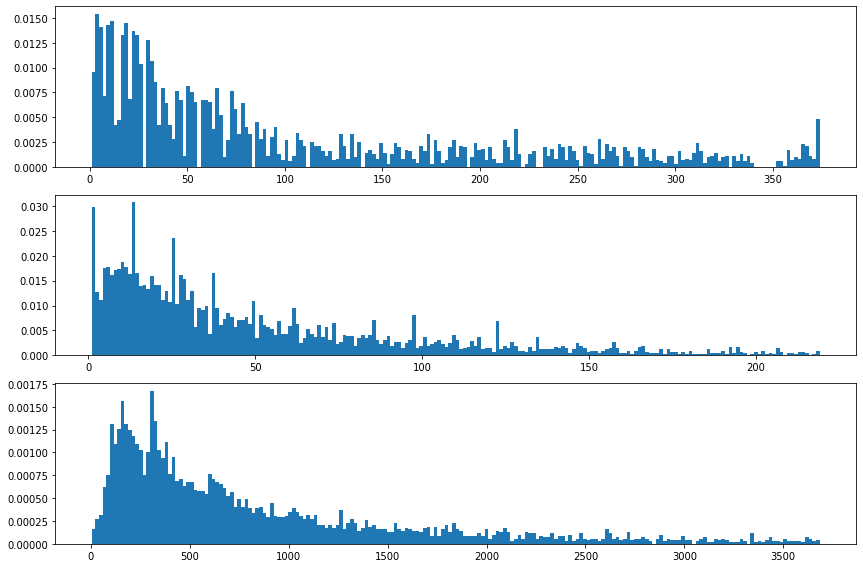

In [42]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))

nBins = 200
ax1.hist( trRFM['Recency'],   nBins,  density=True)
ax2.hist( trRFM['Frequency'], nBins,  density=True)
ax3.hist( trRFM['Monetary'],  nBins,  density=True)

fig.tight_layout()
fig.show()

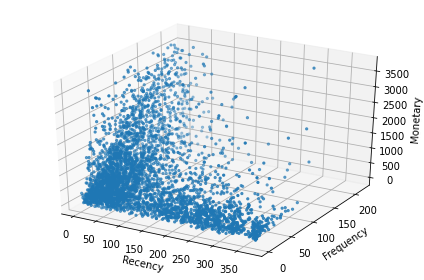

In [43]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.scatter(trRFM['Recency'], trRFM['Frequency'], trRFM['Monetary'], s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

fig.tight_layout()
fig.show()

### **Q4:** Why is important to look for outliers?

Some algorithms can be sensitive to outliers. 

* The *k-means* clustering algorithm is very sensitive to a dataset
that contains outliers or variables that are of incomparable scales or magnitudes. 

### Standardaizing

In [44]:
trRFM['zR'] = ( trRFM['Recency'] - trRFM['Recency'].mean()) / trRFM['Recency'].std()
trRFM['zF'] = ( trRFM['Frequency'] - trRFM['Frequency'].mean()) / trRFM['Frequency'].std()
trRFM['zM'] = ( trRFM['Monetary'] - trRFM['Monetary'].mean()) / trRFM['Monetary'].std()

trRFM.head()

,CustomerID,Recency,Frequency,Monetary,zR,zF,zM
0,12348,76,31,1797.24,-0.267252,-0.400331,1.241948
1,12349,19,73,1757.55,-0.824378,0.501933,1.191057
2,12350,311,17,334.40,2.029673,-0.701086,-0.633750
3,12352,37,85,2506.04,-0.648443,0.759723,2.150794
4,12353,205,4,89.00,0.993613,-0.980358,-0.948410



### **K-means**

**Q1:** How do we choose $k$?

* The Elbow Method

  * We plot the sum of squared errors (between each point and the mean of its cluster) as a function of k and we look at where the graph “bends” (this is visible as an elbow). 

* The Silhouette Method

  * The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

#### **The Elbow Method**

In [45]:
cols = ['zR','zF','zM']

def distance (v, w):
   return math.sqrt( sum([ (v_i-w_i)**2 for v_i, w_i in zip(v,w) ]) )

k_val = list(range(1,10))
sse = []

for k in k_val:
  kmeans = cluster.KMeans(n_clusters=k, random_state=10).fit( trRFM [cols] )
  centroids = kmeans.cluster_centers_
  pred_clusters = kmeans.predict(trRFM [cols])
  k_sse = 0

  for i in range(trRFM.shape[0]):
    center = centroids[pred_clusters[i]]
    point = [ trRFM['zR'][i], trRFM['zF'][i], trRFM['zM'][i]   ]
    k_sse += distance( point, center)

  sse.append(k_sse)

# ** NOTE **
#
#  cluster_centers_ : ndarray of shape (n_clusters, n_features)
#    Coordinates of cluster centers.
#
#  labels_ : ndarray of shape (n_samples,)
#    Labels of each point 
#
# ** NOTE **

#trRFM.head()


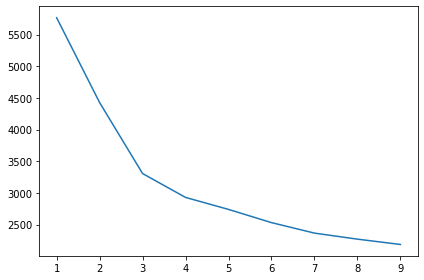

In [46]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()
ax.plot( k_val, sse)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
fig.show()


The Elbow Method suggests that 3 is the 'right' number of clusters, the main bend in the chart is at $k=3$.

#### **The Silhouette Method**

* The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

  * The range of the Silhouette value is between +1 and -1. 
  
  * A high value is desirable and indicates that the point is placed in the correct cluster.

  * If many points have a negative Silhouette value, it may indicate that we have created too many or too few clusters.


The silhouette value of one data point $i \in C_I$ is defined as:

$s(i) = \frac{b(i)-a(i)}{max\{a(i),b(i)\} }$, if $ |C_I| > 1$

and

$s(i) = 0 $, if $ |C_I| = 1$

where $a(i)$ is the similarity of point $i$ with the points in its own cluster and $b(i)$ is the similarity of point $i$ with the points in the neighboring cluster. The similarity is computed as the mean distance from all other points in the cluster.

#### **Mean Silhouette Value**

We compute the mean over all points to get a single value for each $k$.



In [47]:
from sklearn.metrics import silhouette_score

k_val = list(range(2,10))
sil = []

for k in k_val:
  kmeans = cluster.KMeans(n_clusters=k, random_state=10).fit( trRFM [cols] )
  labels = kmeans.labels_
  sil.append(silhouette_score(trRFM [cols], labels))


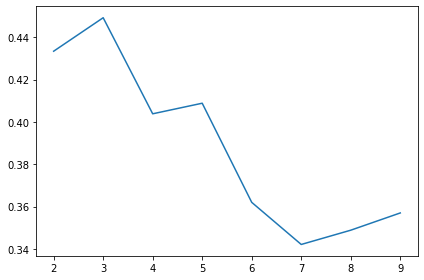

In [48]:
fig, ax = plt.subplots()
ax.plot( k_val, sil)
fig.tight_layout()
fig.show()

The Silhouette Method suggests that both 3 and 5 would be good choices for k.

* We can have a better idea of the silhouette values of all points by plotting them.

* We plot all silhouette values for $k=3$ and $k=5$.

For k = 3 the average silhouette_score is : 0.44918298493860376
For k = 5 the average silhouette_score is : 0.40882941004602846


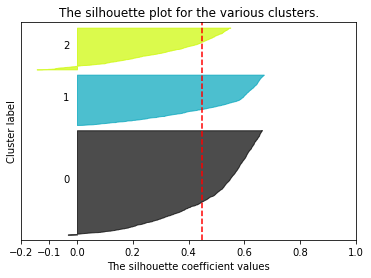

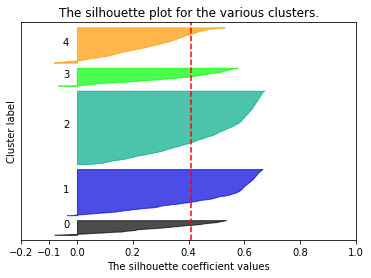

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


cluster_centers = dict()
k_val = [3,5]

for k in k_val:
  fig, ax = plt.subplots()
  # The silhouette coefficient can range from -1, 1,
  # but we do not have values less than -0.2
  ax.set_xlim([-0.2, 1])
  # The (k+1)*100 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax.set_ylim([0, trRFM.shape[0] + (k + 1) * 100])

  kmeans = cluster.KMeans(n_clusters=k, random_state=10).fit( trRFM [cols] )
  labels = kmeans.labels_
  silhouette_avg = silhouette_score(trRFM [cols], labels)
  print(f"For k = {k} the average silhouette_score is : {silhouette_avg}")
  cluster_centers.update( { k : {
                                        'center':kmeans.cluster_centers_,
                                        'silhouette_avg':silhouette_avg,
                                        'labels':labels}
                           })

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(trRFM [cols], labels)

  y_lower = 100
  for i in range(k):
    # Select only value belonging to cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    # Sort them
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # We create a list of k colors from the color map nipy_spectral
    color = cm.nipy_spectral(float(i) / k)
    ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
    )

# ** NOTE **
# 
#  fill_between(y, x1, x2, ... )
#
#    Fill the area between two vertical curves.
#    The curves are defined by the points (y, x1) and (y, x2). 
#    This creates one or multiple polygons describing the filled area.
#
#  arange() 
#
#    Return evenly spaced values within a given interval
#
# ** NOTE **

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 100  # 10 for the 0 samples

  ax.set_title("The silhouette plot for the various clusters.")
  ax.set_xlabel("The silhouette coefficient values")
  ax.set_ylabel("Cluster label")

  # The vertical line for average silhouette score of all the values
  ax.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax.set_yticks([])  # Clear the yaxis labels / ticks
  ax.set_xticks([-0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


#### **Labeling Clusters**

We de-standardize the center of each cluster, to understand what is the profile of the customers inside each of them.

In [50]:
k_val = [3,5]
cols = ['Recency','Frequency','Monetary']
dfDic = {'Recency':[],'Frequency':[],'Monetary':[], 'Cluster':[] , 'k':[]}

for k in k_val:
  center = cluster_centers[k]['center']
  for ce in range(k):
    dfDic['k'].append(k)
    dfDic['Cluster'].append(ce)
    for i,co in enumerate(cols):      
      dfDic[co].append(trRFM[co].std()*center[ce][i]+trRFM[co].mean())

dfClusters = pd.DataFrame(dfDic)
dfClusters

,Recency,Frequency,Monetary,Cluster,k
0,53.592296,35.091046,591.302603,0,3
1,255.970984,21.675648,367.291295,1,3
2,43.548750,119.703750,1978.264039,2,3
3,45.369492,133.061017,895.697763,0,5
4,259.502703,21.117838,357.833362,1,5
5,57.134328,25.546811,406.309520,2,5
6,41.226519,130.596685,2631.633925,3,5
7,51.437853,60.887006,1373.280819,4,5


In [51]:
dfClusters[ dfClusters['k'] == 3]

,Recency,Frequency,Monetary,Cluster,k
0,53.592296,35.091046,591.302603,0,3
1,255.970984,21.675648,367.291295,1,3
2,43.548750,119.703750,1978.264039,2,3


#### **Three Clusters (Customer Segments):** 

* **High value customer:** Customers in *cluster 2* place orders with the highest value at a very high relative frequency compared to other customers. They are also the ones who placed an order the most recently.

* **Medium value customer:** Customers in *cluster 0* place orders of considerable amount, though not as much as high as customers in *cluster 2*, but still higher than customers in *cluster 1*. Their orders are relative more frequent than those placed by customers in *cluster 1* and slightly less recent that customers in *cluster 2*. 

* **Low value customer:** Customers in *cluster 1* rarely shop and when they order, their orders are pretty low valued. They placed their last order a long time ago. Customers in this cluster could be at risk.


In [52]:
dfClusters[ dfClusters['k'] == 5]

,Recency,Frequency,Monetary,Cluster,k
3,45.369492,133.061017,895.697763,0,5
4,259.502703,21.117838,357.833362,1,5
5,57.134328,25.546811,406.309520,2,5
6,41.226519,130.596685,2631.633925,3,5
7,51.437853,60.887006,1373.280819,4,5


#### **Five Clusters (Customer Segments):** 

* **Top customer:** Customers in *cluster 3* are high value customer who has shopped recently and shops regularly for high value orders.

* **High value customer:** Customers in *cluster 4* place quite high valued orders but do not do so frequently or have not done it much recently. 

* **Medium value customer:** Customers in *cluster 0* have recently placed medium valued orders. Consumers in this group have a high value of frequency. In the long-term view, some of the consumers might be potentially very highly profitable. 

* **Low value customers:** Customers in *cluster 2* placed medium valued orders quite a long time ago and they do not do so frequently.
 
* **Lost Customers:** Customers in *cluster 1* have not shopped in the longest time, nor do they shop frequently and their orders are of the lowest values. The low value of frequency and the high value of recency are signals that these customers are at risk or we have already lost them.


#### **Exercise**

* **Q1:** What is the size of each cluster?

* **Q2:** What percentage of the total sales do the customers in the most valuable cluster represent?

   * **Q2.1:** What is the sales percentage of each cluster?

* **Q3:** How does the result of our analysis change if: we cap our data instead of trimming them, we apply the percentile approach to identify outliers, we keep all outliers without *treating* them? 

## **Clustering (percentiles)**

We can use other methods to cluster our customers, a common approach is to use percentiles.

* RFM analysis involves scoring and ranking customers according to three attributes separately.

* A common approach is to have five grades for each attribute, yielding a total of 125 combinations.

  * We assign a score from one to five to recency, frequency and monetary values individually for each customer. 
  
  * Five is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.
  
    * Customers who purchased recently, are frequent buyers and spend a lot are assigned score of 555 – Recency(R) – 5, Frequency(F) – 5, Monetary(M) – 5. They are your best customers.

    * Customers spending the lowest, making hardly any purchase and that too a long time ago are assigned score of 555. Recency(R) – 1, Frequency(F) – 1, Monetary(M) – 1. 




#### **Q1:** How do we calculate RFM scores on scale of 1-5?

* We make five equal parts based on available values. We use percentiles.

* Percentile is simply the percentage of values that fall at or below a certain observation.

The following image is taken from MathIsFun.com.



  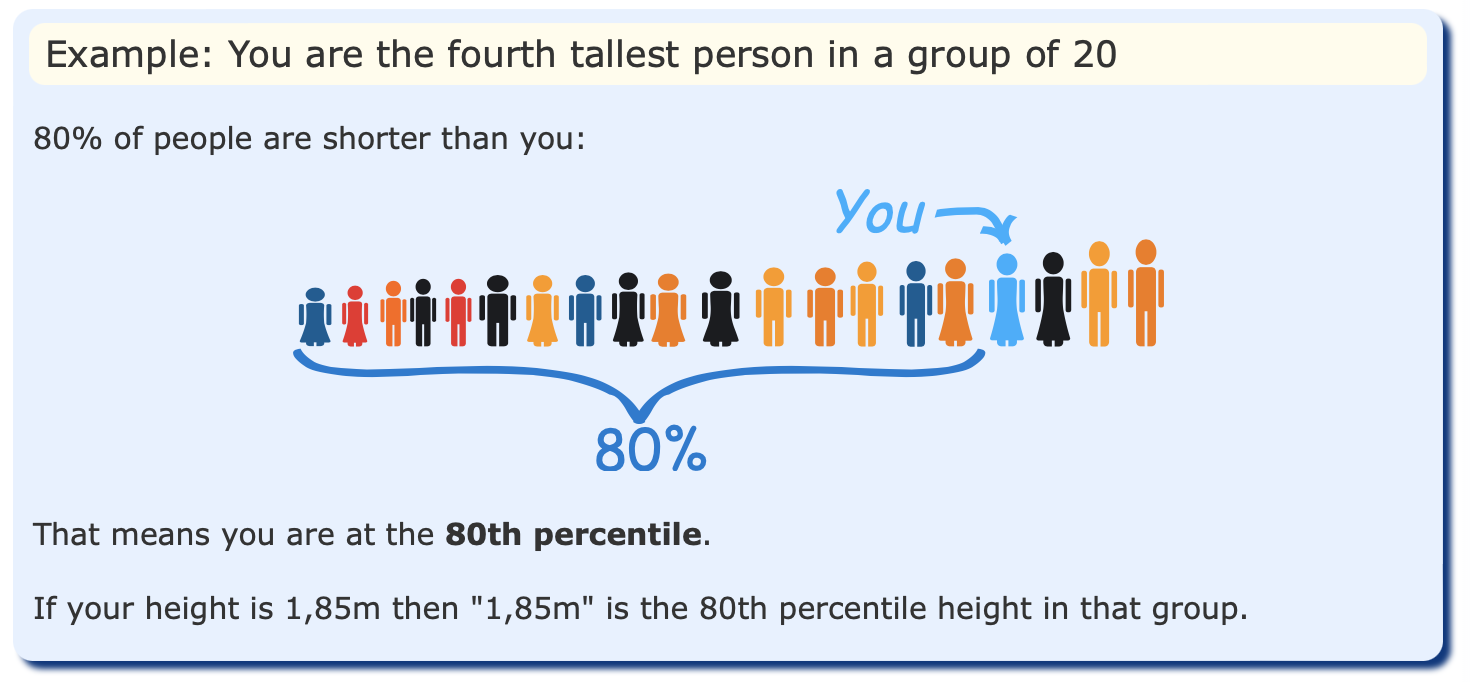

#### **Quintiles**

We use quintiles that are like percentile, but instead of dividing the data in 100 parts, we divide it in 5 equal parts.

In [53]:
# We compute the RFM score of each customer

dfRFM["R"] = pd.qcut( dfRFM["Recency"],    5,  labels=[5,4,3,2,1] )
dfRFM["F"] = pd.qcut( dfRFM["Frequency"],  5,  labels=[1,2,3,4,5] )
dfRFM["M"] = pd.qcut( dfRFM["Monetary"],   5,  labels=[1,2,3,4,5] )

# ** NOTE **
# 
#  qcut(x, q, labels=None, ...)
#
#    Quantile-based discretization function.
#    Discretize variable into equal-sized buckets based on rank 
#    or based on sample quantiles. 
# 
#    x: 1d ndarray or Series
#
#    q: int or list-like of float
#      Number of quantiles. 10 for deciles, 4 for quartiles, etc. 
#      Alternately array of quantiles, e.g. [0, .25, .5, .75, 1.] for quartiles.
#
#    labels: array or False, default None
#      Used as labels for the resulting bins. Must be of the same length 
#      as the resulting bins. If False, return only integer indicators of 
#      the bins. If True, raises an error. 
#
# ** NOTE **

dfRFM["RFM_Score"] = dfRFM["R"].astype(str) + dfRFM["F"].astype(str) + dfRFM["M"].astype(str)

dfRFM

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,12346,326,1,77183.60,1,1,5,115
1,12347,3,182,4310.00,5,5,5,555
2,12348,76,31,1797.24,2,3,4,234
3,12349,19,73,1757.55,4,4,4,444
4,12350,311,17,334.40,1,2,2,122
...,...,...,...,...,...,...,...,...
4333,18280,278,10,180.60,1,1,1,111
4334,18281,181,7,80.82,1,1,1,111
4335,18282,8,12,178.05,5,1,1,511
4336,18283,4,721,2045.53,5,5,4,554


### **Exercise**

* **Q1:** What is the maximum number of clusters that this method creates?

* **Q2:** How many clusters did we create?

* **Q3:** How many customers do we have inside each cluster?

* **Q4:** Which are the most populated clusters (top10)?

### **Labeling**

* **Q1:** How do we label our clusters?

We propose the following labeling with 7 clusters. 

* We treat Frequency and Monetary as a single combined value (dimension).

| Label |	Description |	R | F+M |
| --- | --- | --- | --- | 
| Champions | Bought recently, buy often<br> and spend a good amount. | 5 | 9-10 |
| Loyal | Buy often from our store<br> and spend a good amount.<br> Customers who have the<br> most potential to become<br> the Champions. | 3-4 | 8-10 |
| Recent | Bought recently, but not<br>  often or for an over avarage<br>  amount. | 4<br>5 | 2-7<br>2-8 |
| Needing Attention | Above average recency or<br> frequency or monetary<br> values.  |2<br>3 |8-10<br>2-7 |
| About to sleep | Below average recency,<br> frequency and monetary<br> value. | 2| 2-7 |
| Can't lose them| Made big purchases, and<br> often. They have not<br> returned for a long time.|1| 8-10 |
|Hibernating|Last purchase was long back,<br> low spenders and low number<br> of orders|1|2-7|

In [60]:
# We apply our lables to our dataset

dfRFM['Label'] = [np.nan]*dfRFM.shape[0]

dfRFM.loc[ (dfRFM['R'].astype(int) == 5) & ((dfRFM["F"].astype(int)+dfRFM["F"].astype(int)) >= 9 ), 'Label'] = "Champions"

dfRFM.loc[ (dfRFM['R'].astype(int) == 4) & ((dfRFM["F"].astype(int)+dfRFM["F"].astype(int)) >= 8 ), 'Label'] = "Loyal"
dfRFM.loc[ (dfRFM['R'].astype(int) == 3) & ((dfRFM["F"].astype(int)+dfRFM["F"].astype(int)) >= 8 ), 'Label'] = "Loyal"

dfRFM.loc[ (dfRFM['R'].astype(int) == 5) & ((dfRFM["F"].astype(int)+dfRFM["F"].astype(int)) <= 8 ), 'Label'] = "Recent"
dfRFM.loc[ (dfRFM['R'].astype(int) == 4) & ((dfRFM["F"].astype(int)+dfRFM["F"].astype(int)) <= 7 ), 'Label'] = "Recent"

dfRFM.loc[ (dfRFM['R'].astype(int) == 2) & ((dfRFM["F"].astype(int)+dfRFM["F"].astype(int)) >= 8 ), 'Label'] = "Needing Attention"
dfRFM.loc[ (dfRFM['R'].astype(int) == 3) & ((dfRFM["F"].astype(int)+dfRFM["F"].astype(int)) <= 7 ), 'Label'] = "Needing Attention"

dfRFM.loc[ (dfRFM['R'].astype(int) == 2) & ((dfRFM["F"].astype(int)+dfRFM["F"].astype(int)) <= 7 ), 'Label'] = "About to Sleep"

dfRFM.loc[ (dfRFM['R'].astype(int) == 1) & ((dfRFM["F"].astype(int)+dfRFM["F"].astype(int)) >= 8 ), 'Label'] = "Can't Lose Them"

dfRFM.loc[ (dfRFM['R'].astype(int) == 1) & ((dfRFM["F"].astype(int)+dfRFM["F"].astype(int)) <= 7 ), 'Label'] = "Hibernationg"

dfRFM



,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score,Label
0,12346,326,1,77183.60,1,1,5,115,Hibernationg
1,12347,3,182,4310.00,5,5,5,555,Champions
2,12348,76,31,1797.24,2,3,4,234,About to Sleep
3,12349,19,73,1757.55,4,4,4,444,Loyal
4,12350,311,17,334.40,1,2,2,122,Hibernationg
...,...,...,...,...,...,...,...,...,...
4333,18280,278,10,180.60,1,1,1,111,Hibernationg
4334,18281,181,7,80.82,1,1,1,111,Hibernationg
4335,18282,8,12,178.05,5,1,1,511,Recent
4336,18283,4,721,2045.53,5,5,4,554,Champions


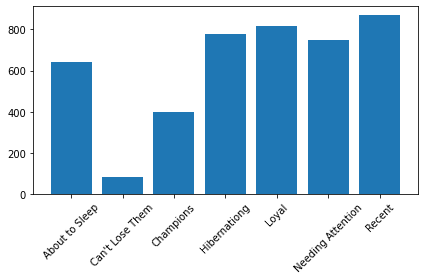

In [61]:
fig, ax = plt.subplots()

pltRFM = dfRFM.groupby('Label', as_index=False).aggregate({'CustomerID':'nunique'})

ax.bar(x=pltRFM['Label'], height=pltRFM["CustomerID"])
#ax.set_title("Transaction Types") # Add a title to the axes.
ax.tick_params(axis='x', labelrotation=45)
fig.tight_layout()
fig.show()